In [2]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display



/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


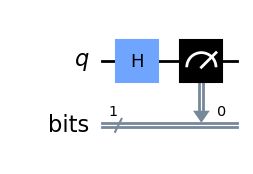

In [3]:

# Qubits - mostra o circuito quantico 
qr = QuantumRegister(size = 1, name = "q")
# Bits
cr = ClassicalRegister(size = 1, name = 'bits')
# Circuito Quântico
qc = QuantumCircuit(qr, cr)
# Gates que eu posso mudar
qc.h(qr)
#qc.z(qr[1])
# Medição
qc.measure(qr, cr)# measure_all
# Visualizando
qc.draw('mpl')


{'0': 507, '1': 493}


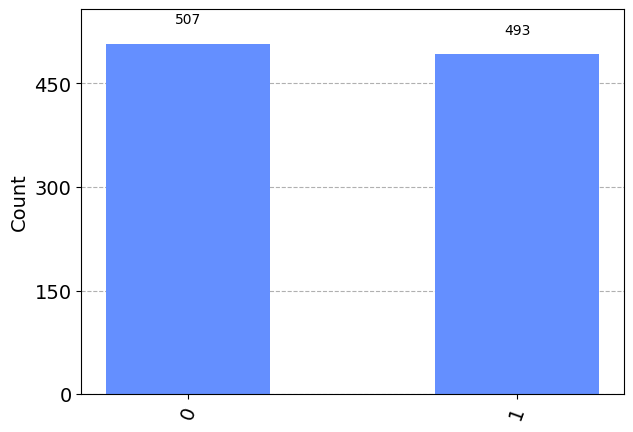

In [4]:

#Posso mudar aqui tbm
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)



/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


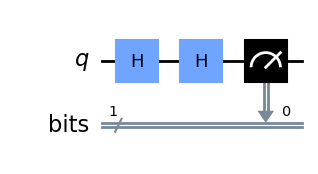

{'0': 1000}


In [5]:
n_qubits = 1
n_bits = 1
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.h(qr)
qc.measure(qr, cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
#plot_histogram(counts)

{'0': 1000}


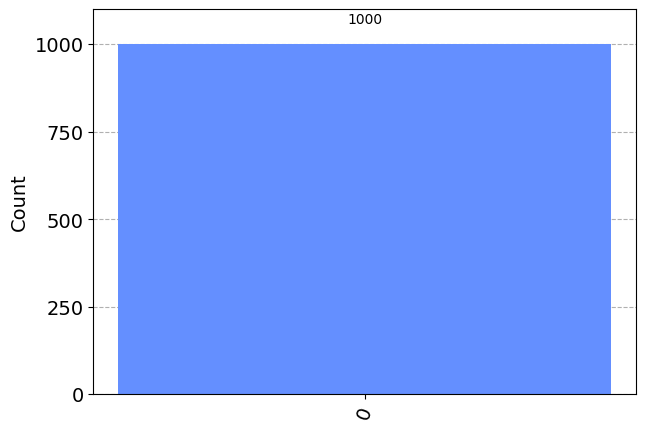

In [6]:
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


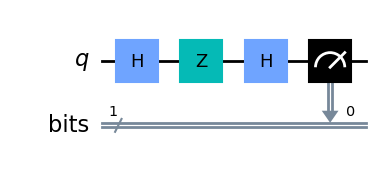

{'1': 1000}


In [7]:
n_qubits = 1
n_bits = 1
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.z(qr)
qc.h(qr)
qc.measure(qr, cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
#plot_histogram(counts)

In [6]:
#Operador oraculo - função constante e balanceada 
def oracle(case: int):
    Uf = QuantumCircuit(1)
    if case == 1:
        Uf.i(0)
    if case == 2:
        Uf.z(0)
    if case == 3:
        Uf.x(0)
        Uf.z(0)
        Uf.x(0)
    if case == 4:
        Uf.x(0)
        Uf.z(0)
        Uf.x(0)
        Uf.z(0)
    return Uf

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


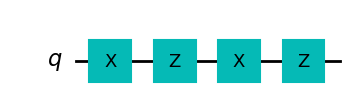

In [7]:
oracle(4).draw('mpl')

/tmp/ipykernel_5058/2155415882.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  Uf.i(0)


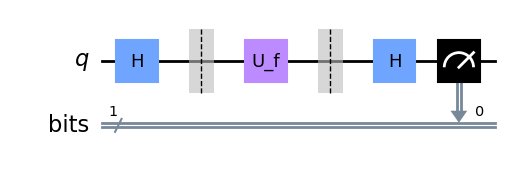

In [8]:
#descobre se a função é constante ou balanceada -um algoritmo 

def circuit(function: QuantumCircuit):
    cr = ClassicalRegister(1, name = 'bits')
    qr = QuantumRegister(1, name = 'q')
    qc = QuantumCircuit(qr, cr)

    qc.h(qr)
    
    qc.barrier()
    qc.compose(function.to_gate(label = 'U_f'), inplace=True)
    qc.barrier()

    qc.h(qr)
    qc.measure(qr, cr)
    return qc

circuit(oracle(1)).draw('mpl')

/tmp/ipykernel_5058/2155415882.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  Uf.i(0)


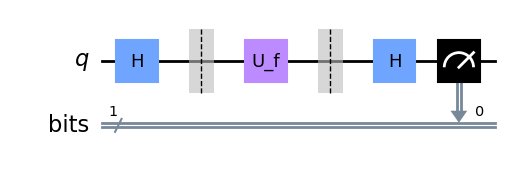

In [9]:
def circuit(function: QuantumCircuit):
    cr = ClassicalRegister(1, name = 'bits')
    qr = QuantumRegister(1, name = 'q')
    qc = QuantumCircuit(qr, cr)

    qc.h(qr)
    
    qc.barrier()
    qc.compose(function.to_gate(label = 'U_f'), inplace=True)
    qc.barrier()

    qc.h(qr)
    qc.measure(qr, cr)
    return qc

circuit(oracle(1)).draw('mpl')

In [12]:
# Escolhendo uma função aleatóriamente
f = np.random.randint(1,5)
print(f'A função f_{f} foi escolhida aleatoriamente')
# Construindo o operador Oráculo
U = oracle(f)
# Introduzindo o operador Oráculo no circuito
qc = circuit(U)
#display(qc.draw('mpl'))

A função f_1 foi escolhida aleatoriamente


/tmp/ipykernel_5058/2155415882.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  Uf.i(0)


In [13]:
# Fazendo a medição com apenas 1 shot
shot = 1
backend = AerSimulator()
#result = backend.run(circuits = qc, shots = shots).result()
result = execute(experiments = qc, backend = backend, shots = shot).result().get_counts()
if '0' in result:
    print('A função implementada é constante')
elif '1':
    print('A função implementada é balanceada')

A função implementada é constante


/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


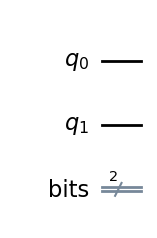

In [14]:
#Sistema com 2 qubits
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.draw('mpl')

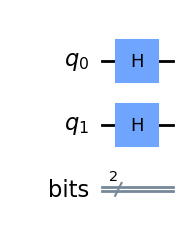

In [15]:
#Produto ensorial de operadores 
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.draw('mpl')

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


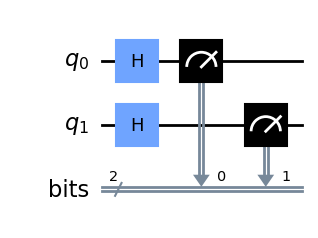

{'00': 238, '10': 259, '01': 246, '11': 257}


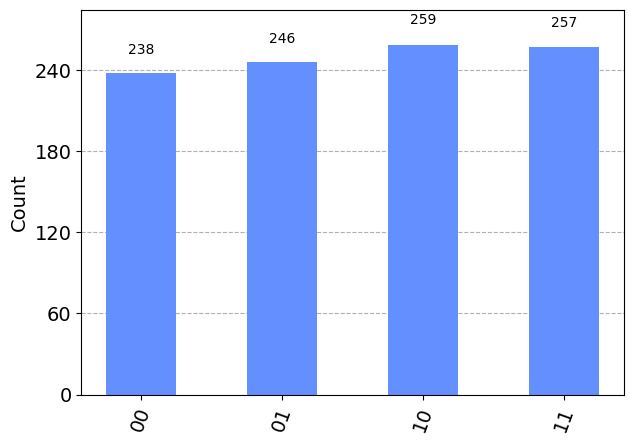

In [16]:
#Exercício: Mostrar que o anterior é equivalente a calcular primeiro e aplicar sobre o estado 
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.measure(qr,cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


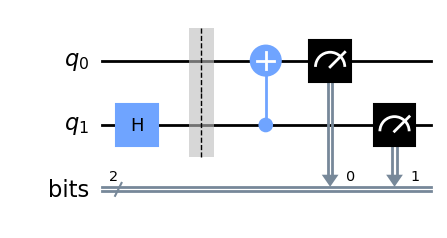

{'00': 488, '11': 512}


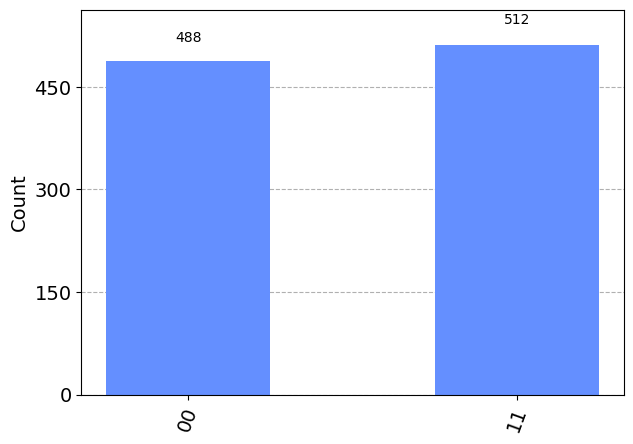

In [17]:
#CNOT - um qubit de controle e de alvo, ser for 0 não muda e se for 1 muda o da direita 
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr[1])
qc.barrier()
qc.cx(qr[1], qr[0])
qc.measure(qr,cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)